In [ ]:
# Name - Mukund Saraf
# UID - U20240033
# MLPR - Lab 5

### Instructions
##### Follow the instructions given in comments prefixed with ## and write your code below that.
##### Also fill the partial code in given blanks. 
##### Don't make any changes to the rest part of the codes
##### Answer the questions given at the end of this notebook within your report.
##### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.

In [1]:
import cv2 ## import cv2
import numpy as np ## import numpy
import matplotlib.pyplot as plt ## import matplotlib pyplot
from sklearn.cluster import KMeans ## import KMeans cluster from sklearn
from scipy.spatial import distance ## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Professors" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.4  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
cv2.imwrite('Graph_1.png', img)
cv2.waitKey(4000)
cv2.destroyAllWindows()

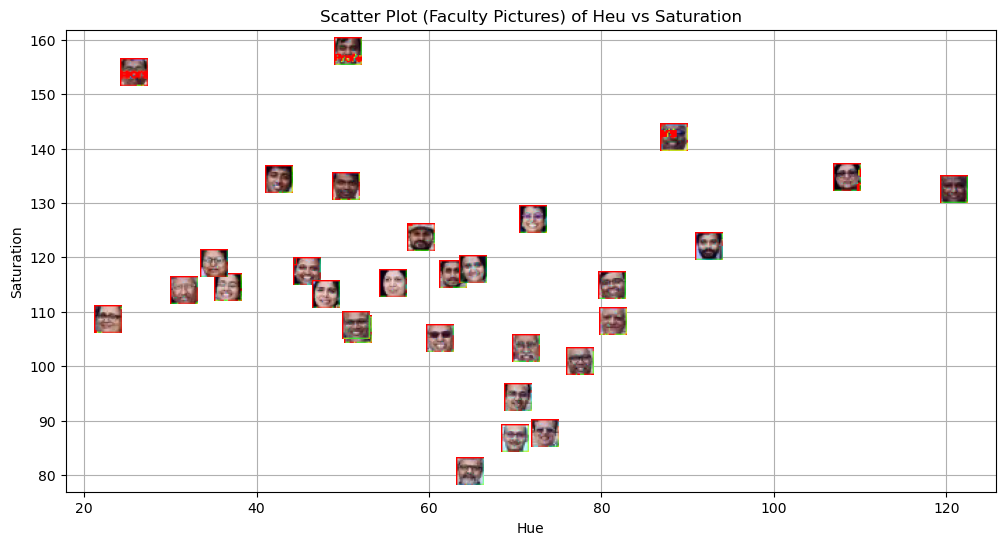

<Figure size 640x480 with 0 Axes>

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Scatter Plot (Faculty Pictures) of Heu vs Saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show()

plt.savefig('Graph_2.png', dpi = 300)

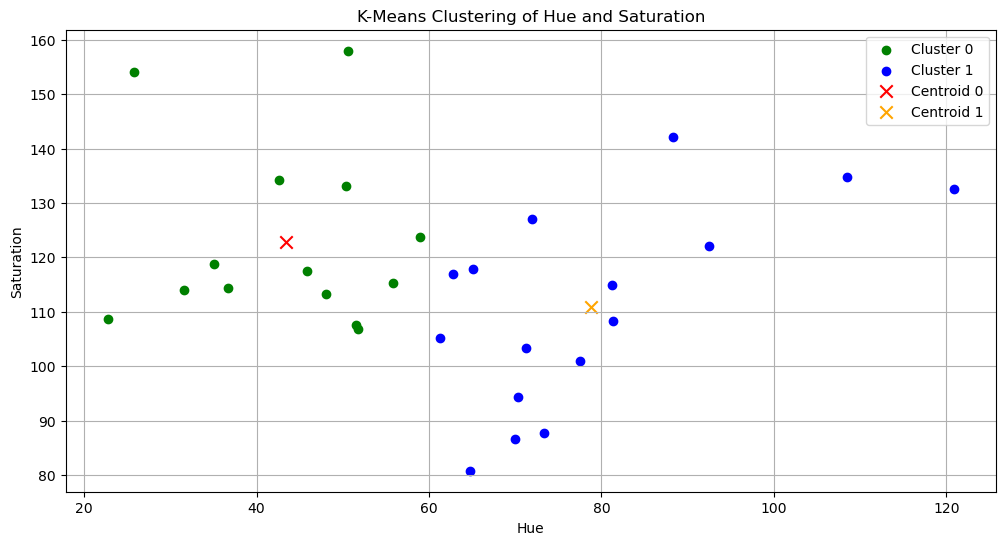

<Figure size 640x480 with 0 Axes>

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=80, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=80, label='Centroid 1')

# Put x label
plt.xlabel('Hue')

# Put y label
plt.ylabel('Saturation')

# Put title
plt.title('K-Means Clustering of Hue and Saturation')

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

plt.savefig('Graph_3.png', dpi = 300)

In [8]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
gray_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template_img, scaleFactor=1.1, minNeighbors=5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Faces in Template Image", template_img)
cv2.waitKey(4000)
cv2.destroyAllWindows()

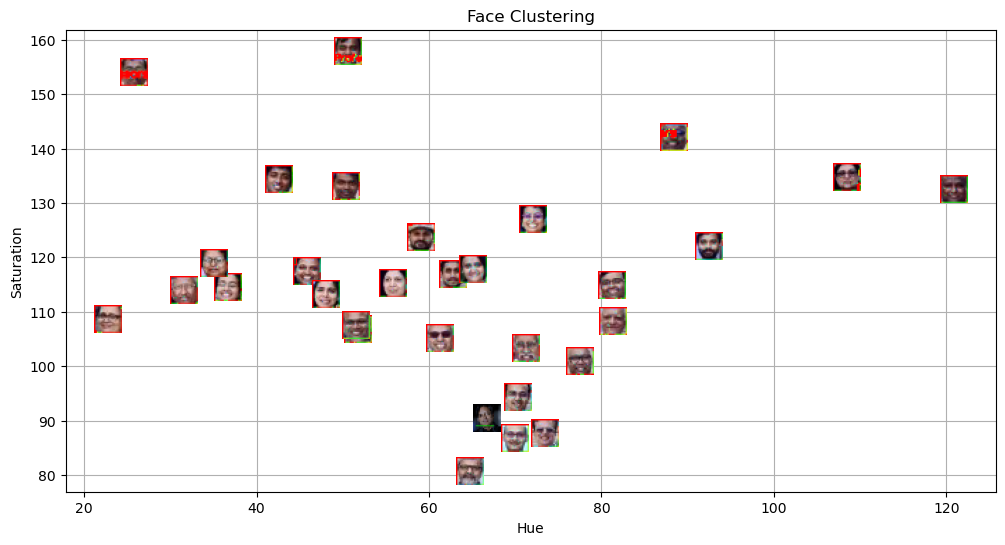

<Figure size 640x480 with 0 Axes>

In [9]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Face Clustering")

## Add grid
plt.grid(True)

## show plot
plt.show()
plt.savefig('Graph_4.png', dpi = 300)

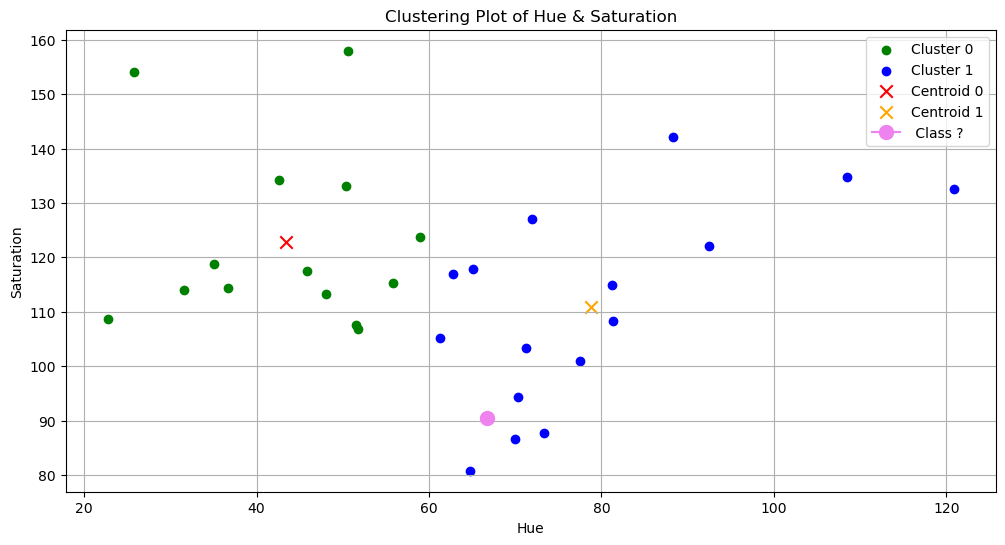

<Figure size 640x480 with 0 Axes>

In [10]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=80, label='Centroid 0')  # plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=80, label='Centroid 1')  # plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clustering Plot of Hue & Saturation")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()
plt.savefig('Graph_5.png', dpi = 300)

### Report:
### Answer the following questions within your report:

### 1. Common Distance Metrics in Classification
Standard metrics include **Euclidean** (linear), **Manhattan** (grid-based), and **Minkowski** (generalized form). **Cosine Similarity** is frequently used for text classification.

### 2. Real-World Applications
* **Biometric Security:** Facial recognition systems that match scanned features to a database of authorized users.
* **Handwriting Recognition:** Classifying handwritten digits (e.g., postal codes) by comparing pixel intensity patterns.
* **Visual Search:** E-commerce tools that find products similar to an uploaded image based on visual distance.

### 3. Distance Metrics Explained
* **Euclidean:** The straight-line distance; standard for most continuous data.
    $$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
* **Manhattan:** The sum of absolute differences; more robust against outliers.
    $$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$
* **Hamming:** Counts the number of differing positions between two strings or bits.

### 4. The Role of Cross-Validation
Cross-validation (e.g., K-Fold) assesses model stability by repeatedly splitting the data. It ensures the model generalizes well to new inputs rather than just memorizing training data (preventing overfitting).

### 5. Variance and Bias in KNN
The value of **K** controls the trade-off:
* **Small K (e.g., K=1):** Low Bias, High Variance. The model captures noise and overfits.
* **Large K (e.g., K=100):** High Bias, Low Variance. The model oversimplifies and underfits.